In [1]:
%who

Interactive namespace is empty.


In [2]:
! ls -l /g/data/w97/ad9701/drought_2017to2020/precip_data/

total 7683924
drwxr-sr-x. 2 ad9701 w97       4096 Apr  3 20:59 10th_percentile
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 15:47 10th_percentile_JJAS
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 11:25 10th_percentile_nonzero
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 13:23 20th_percentile
-rw-r--r--. 1 ad9701 w97    4598365 Mar 11 14:51 agcd_land_mask.nc
-rw-r--r--. 1 ad9701 w97 1434877429 Mar 10 15:37 agcd_monthly_1900_2020.nc
-rw-r--r--. 1 ad9701 w97    4589267 Mar 11 14:19 chirps_land_mask.nc
-rw-r--r--. 1 ad9701 w97  501442526 Mar 10 15:07 chirps_monthly_1981_2021.nc
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 11:35 drght_10th_perc_baseline_198101_202005
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 16:45 drght_10th_perc_baseline_198101_202005_JJAS
drwxr-sr-x. 2 ad9701 w97       4096 Apr  3 23:50 drght_10th_perc_baseline_198101_202005_old
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 13:46 drght_20th_perc_baseline_198101_202005
-rw-r--r--. 1 ad9701 w97    1157021 Mar 11 14:52 mswep_land_mask

In [9]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
%run -i drought_2017to2019/dataInfo_and_functions.py

In [10]:
def get_data_below_thresh_bymon(da, da_thresh):
    mon_array = da['time.month'].values
    time_array = da['time'].values
    da_thresh_sel = da_thresh.sel(month = mon_array).rename({'month':'time'}).assign_coords({'time': time_array})
    da_below_thresh = da.where(da <= da_thresh_sel)
    return da_below_thresh

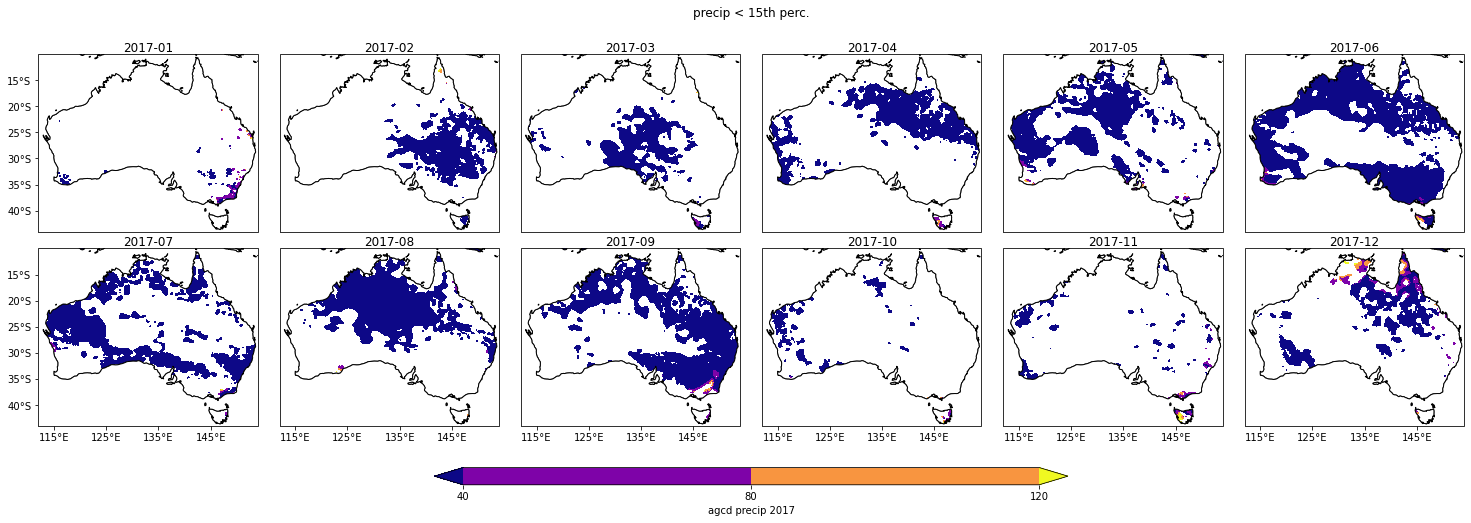

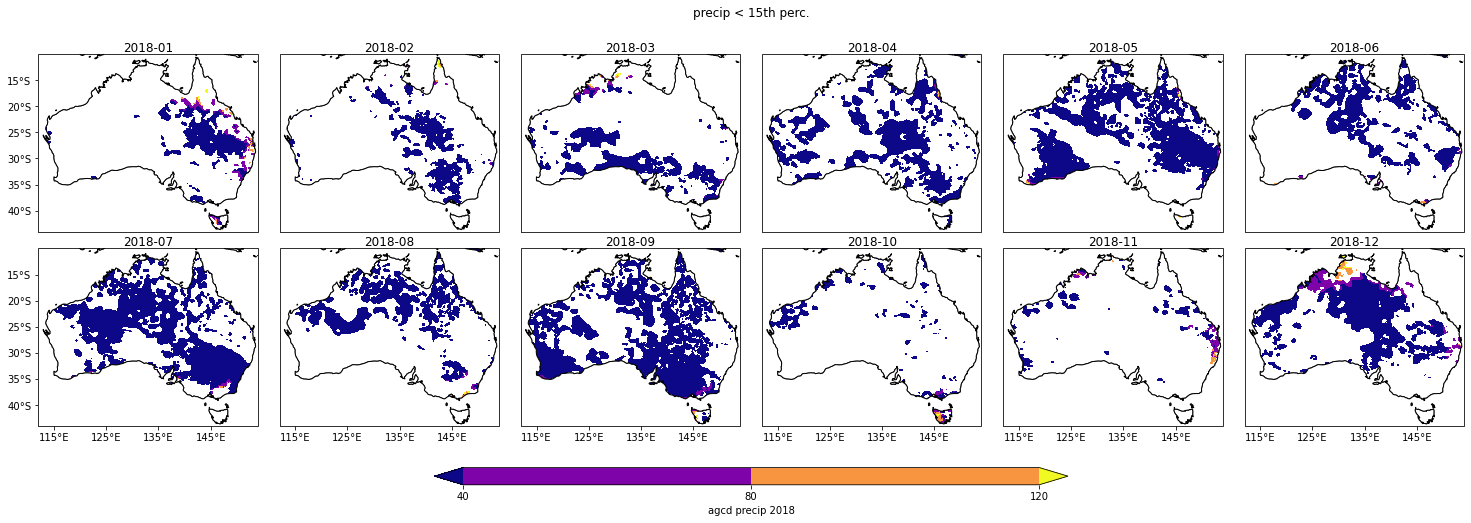

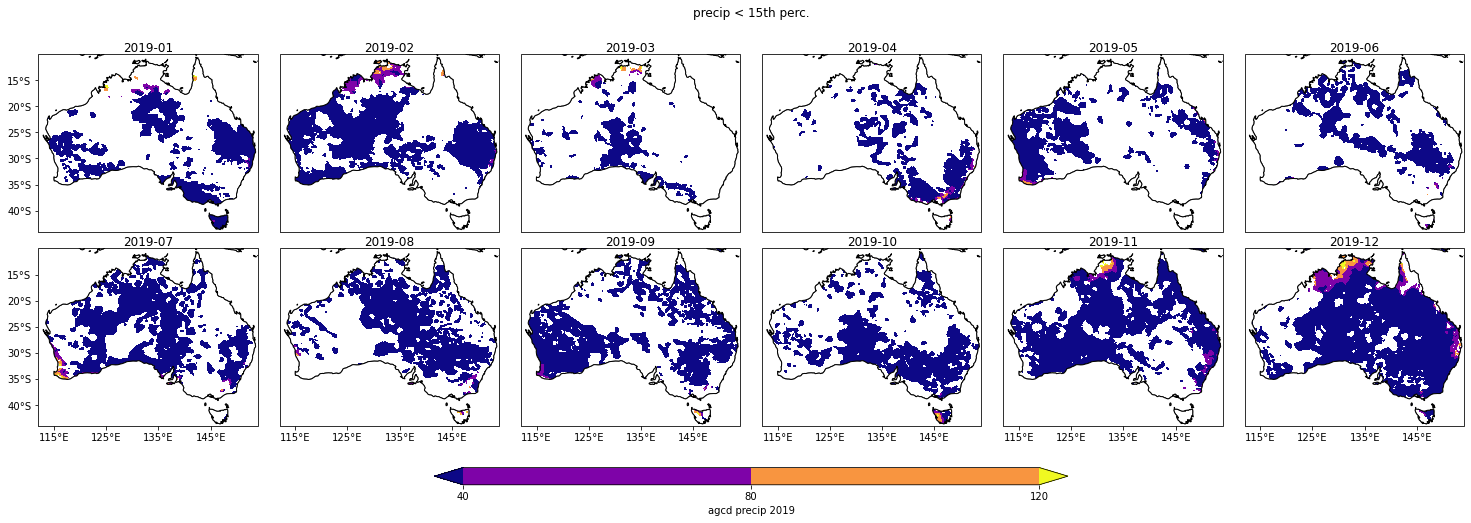

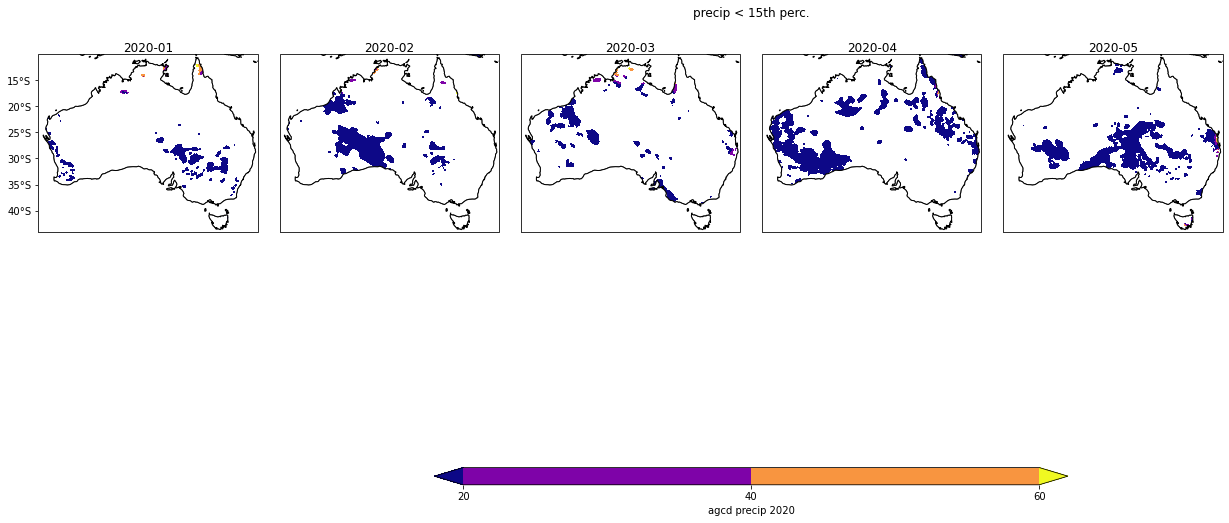

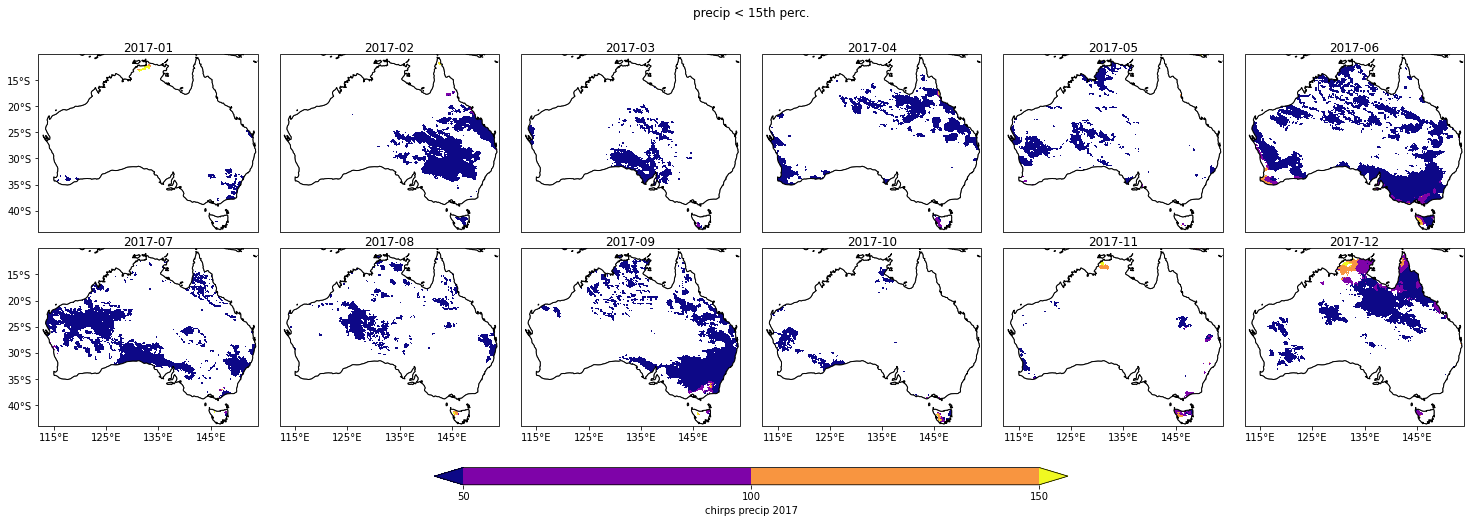

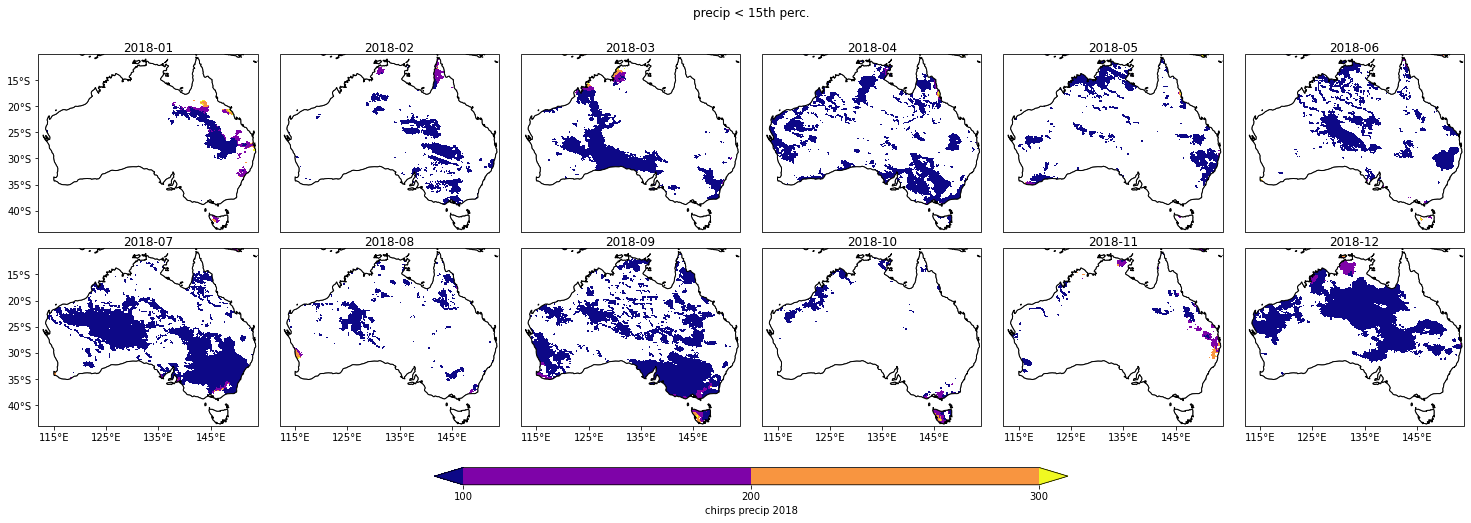

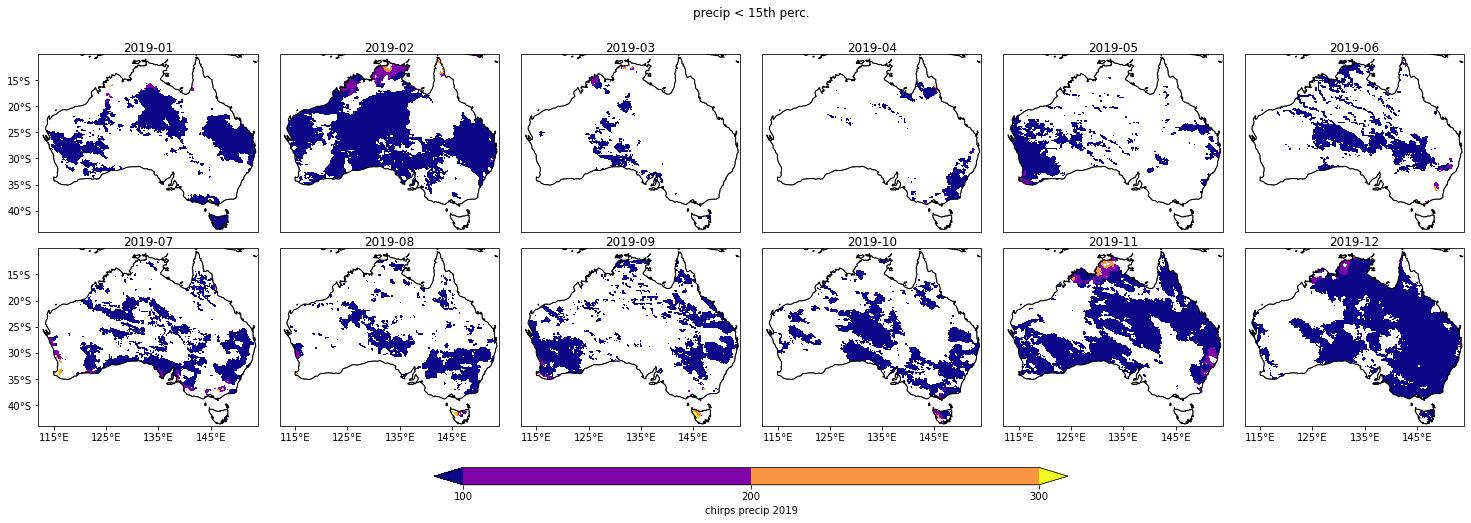

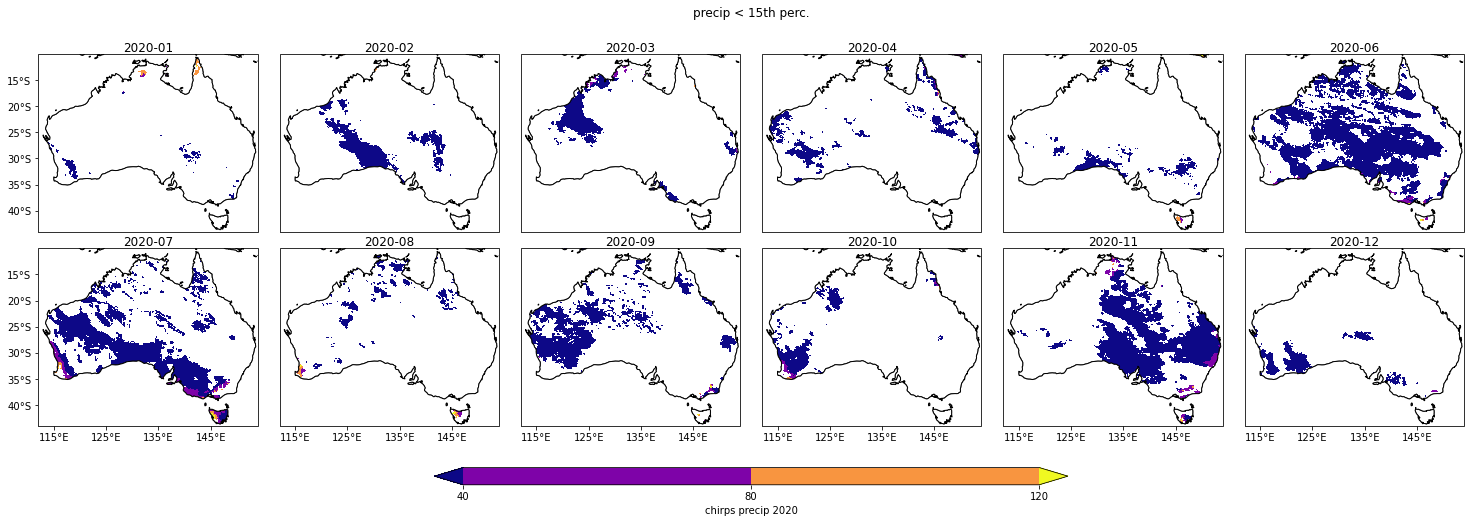

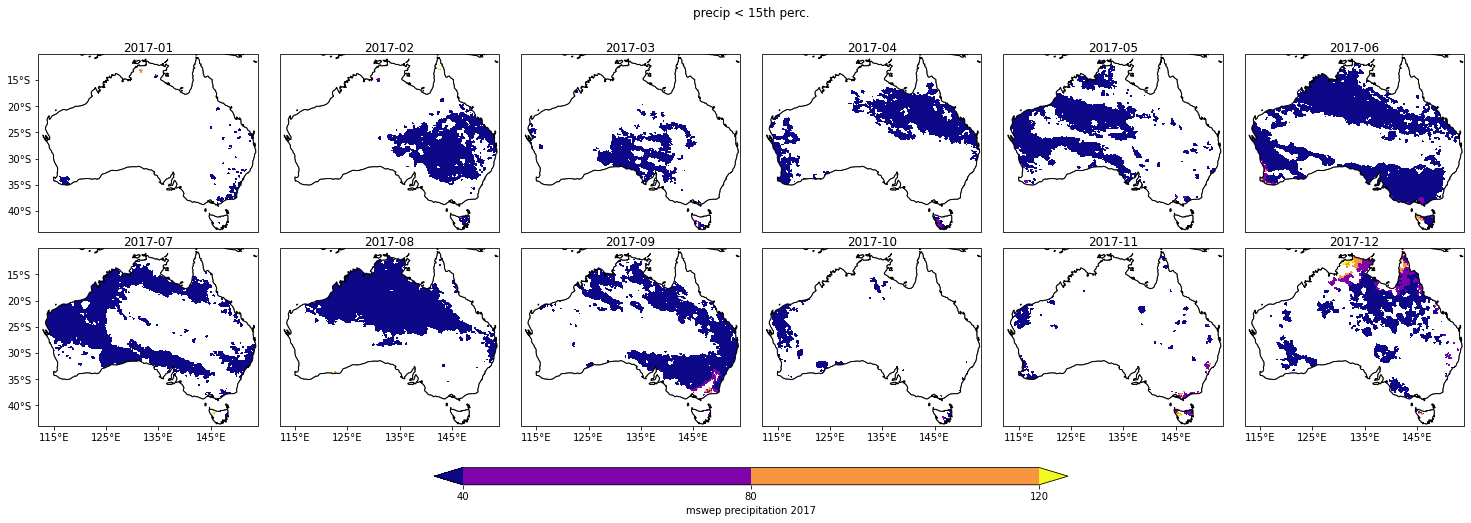

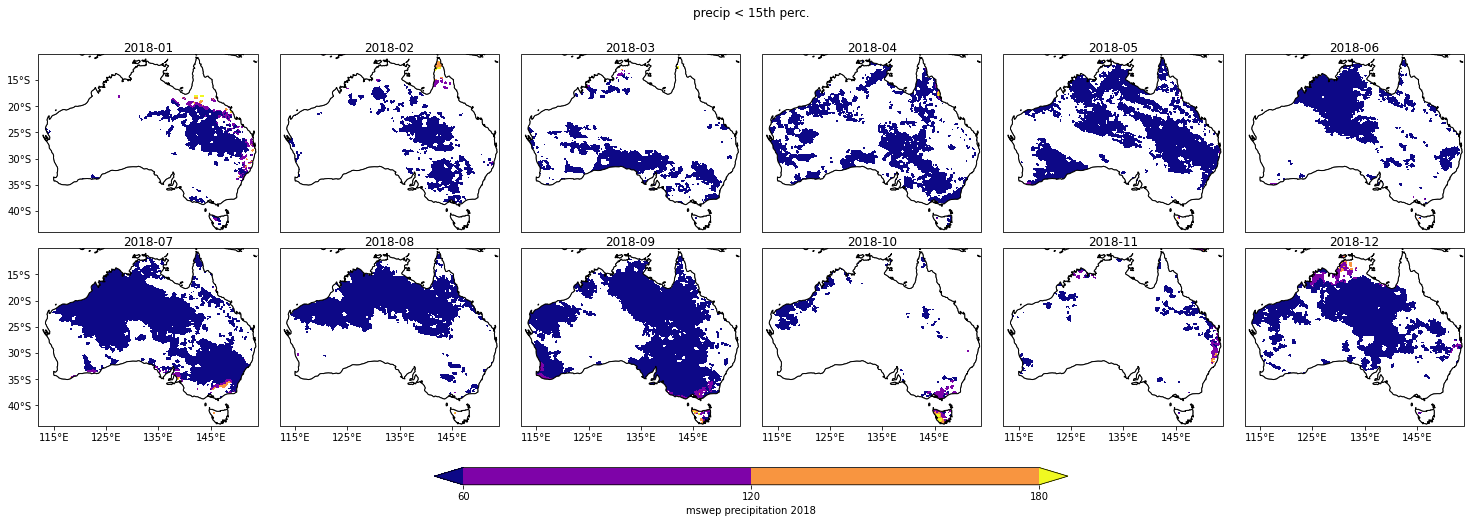

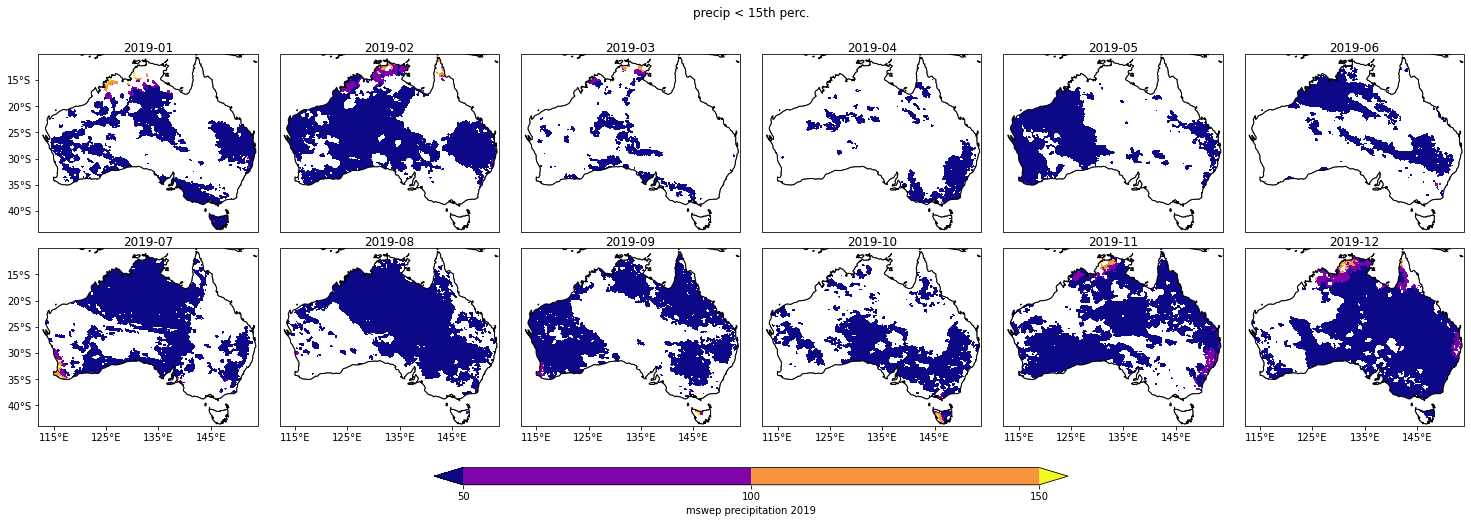

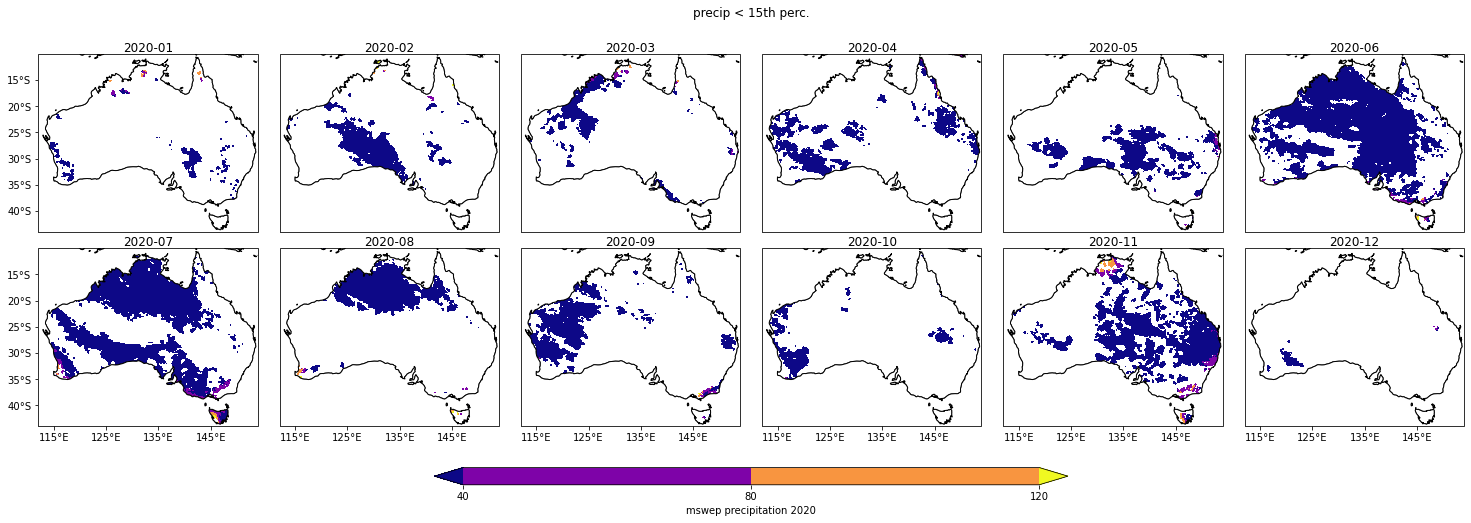

In [21]:
perc = 15

data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = data_dir + 'drght_' + str(perc) + 'th_perc_baseline_198101_202005/'
fig_dir = 'figures/drought_2017to2020/precip/below_' + str(perc) + 'th_perc/'
figname_prefix = 'below' + str(perc) + 'p'

thresh_dir = data_dir + str(perc) + 'th_percentile/'
out_dir = data_dir + 'drght_' + str(perc) + 'th_perc_baseline_198101_202005/'

time_slice = slice('2017-01-01', '2020-12-31')

cmap = 'plasma' #"YlGnBu"

levels = 3 #[0, 10, 20, 30, 40, 50]

for d in ['agcd', 'chirps', 'mswep']: 
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(time = time_slice)
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_' + str(perc) + 'th_perc_threshold.nc')
    da_below_thresh = get_data_below_thresh_bymon(da, ds_thresh[vname])
    da_below_thresh.to_netcdf(out_dir + alldata_dict[d]['mon_file'].split('.')[0] + '_lt_' + str(perc) + 'th_perc.nc')
    
    ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    da_mask = ds_mask['land_mask']
    
    for year in [2017, 2018, 2019, 2020]:
        da_yr = da_below_thresh.sel(time = slice(str(year), str(year))).load()
        da_yr = da_yr*da_mask

        lat_size = abs((da_yr.lat[0]-da_yr.lat[-1]).values)
        lon_size = abs((da_yr.lon[0]-da_yr.lon[-1]).values)
        aspect = lon_size/lat_size
        
        da_plot = da_yr.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year))
        plot_list = [da_plot.sel(month=i) for i in da_plot.month.values]
        
        subplot_title = np.datetime_as_string(da_yr.time.values, unit='M')
        cbar_label = d + ' ' + vname + ' ' + str(year)

        main_title = data_type + ' < ' + str(perc) + 'th perc.'
        out_figname = figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png'
        draw_spatial_plot_12panels(ds_list = plot_list, cmap = cmap, levels = levels, 
                                   subplot_title = subplot_title, main_title = main_title, out_dir = fig_dir, out_figname = out_figname, add_cbar = True, cbar_label = cbar_label)
        
        # da_yr.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = cmap, levels = levels) #"RdBu_r") "YlGnBu"
        # plt.savefig(fig_dir + figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png')
        del da_yr

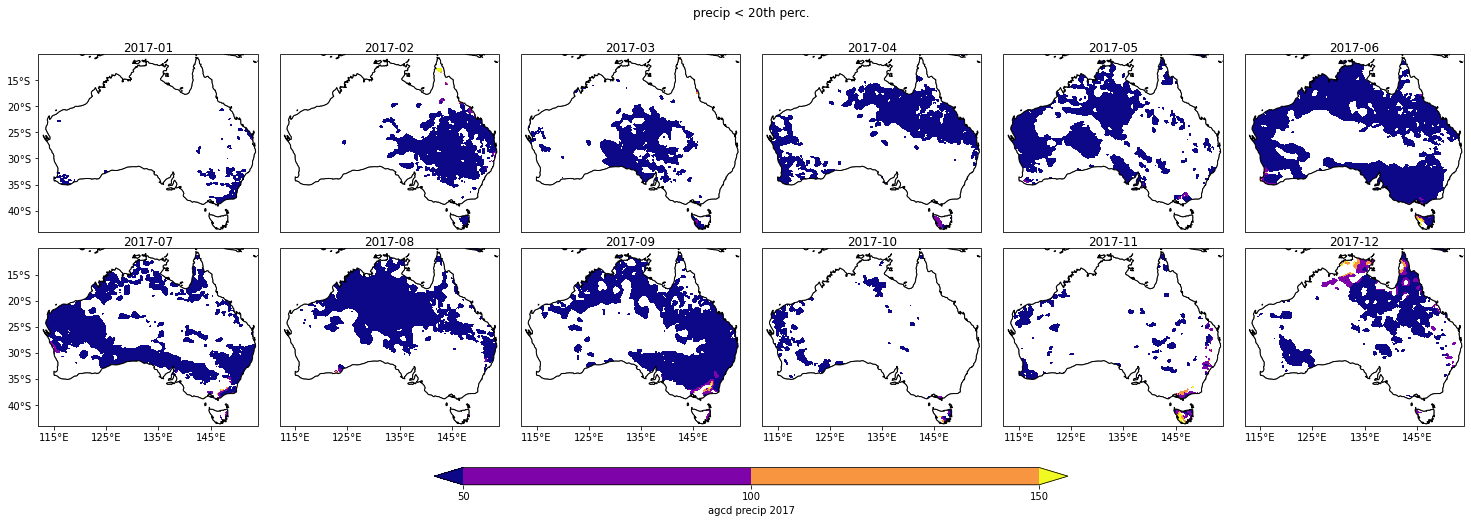

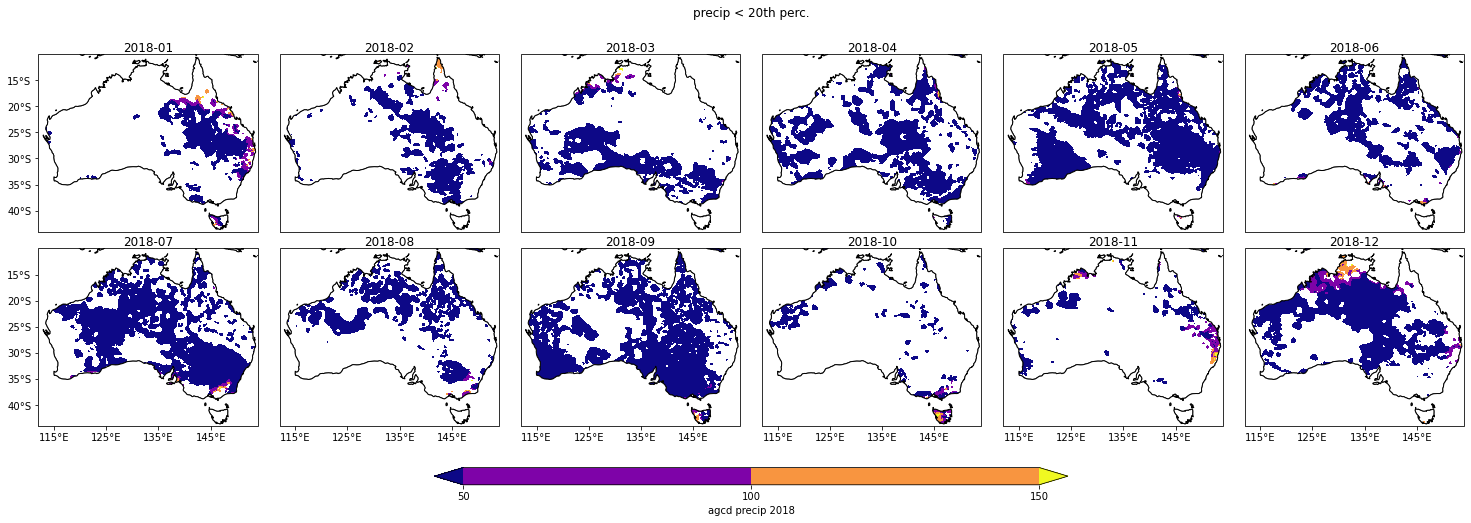

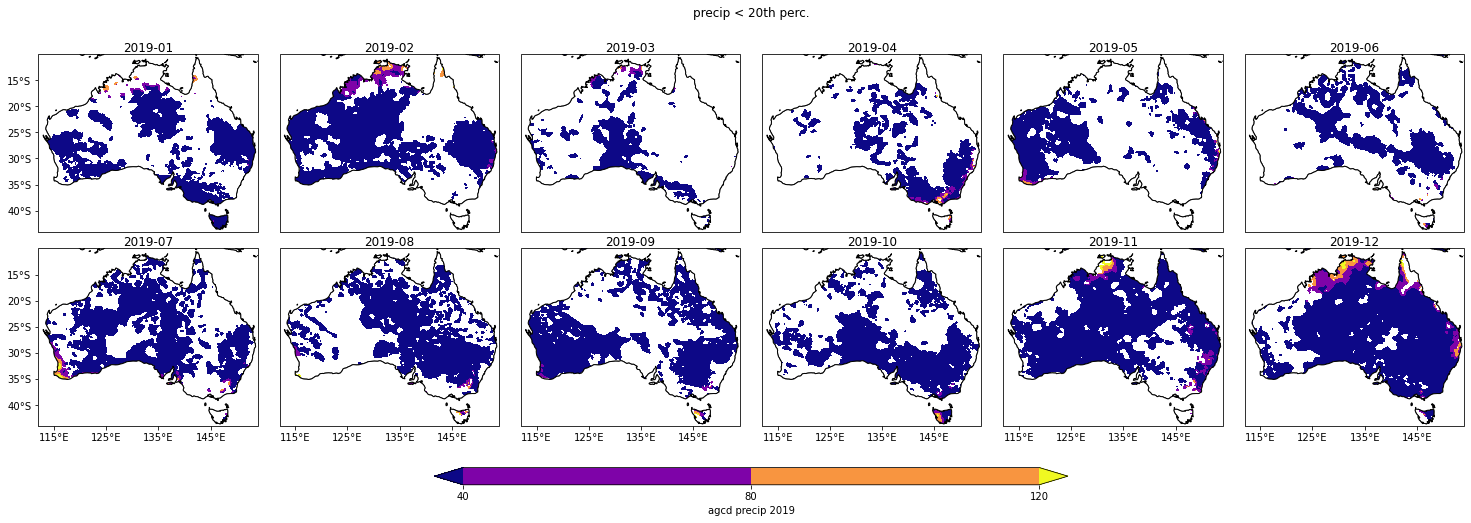

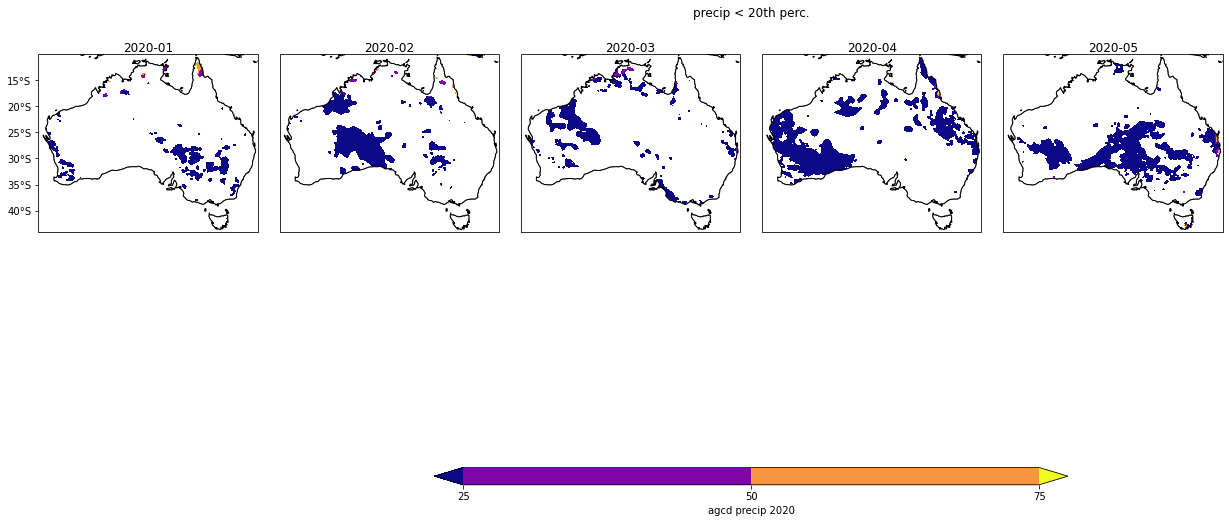

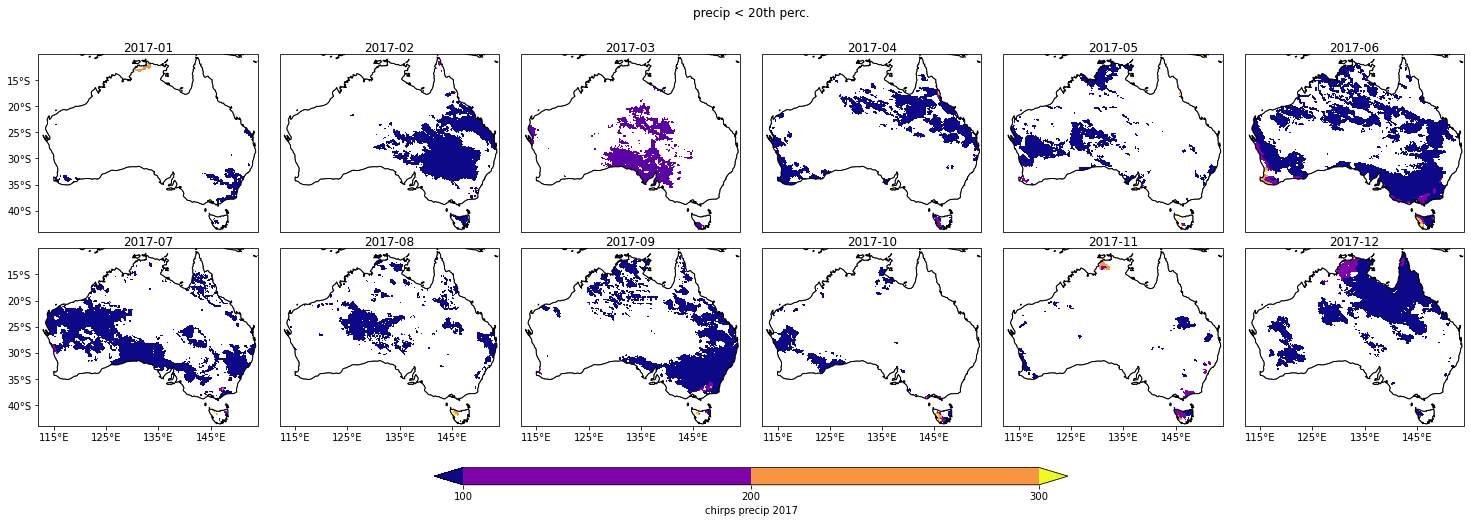

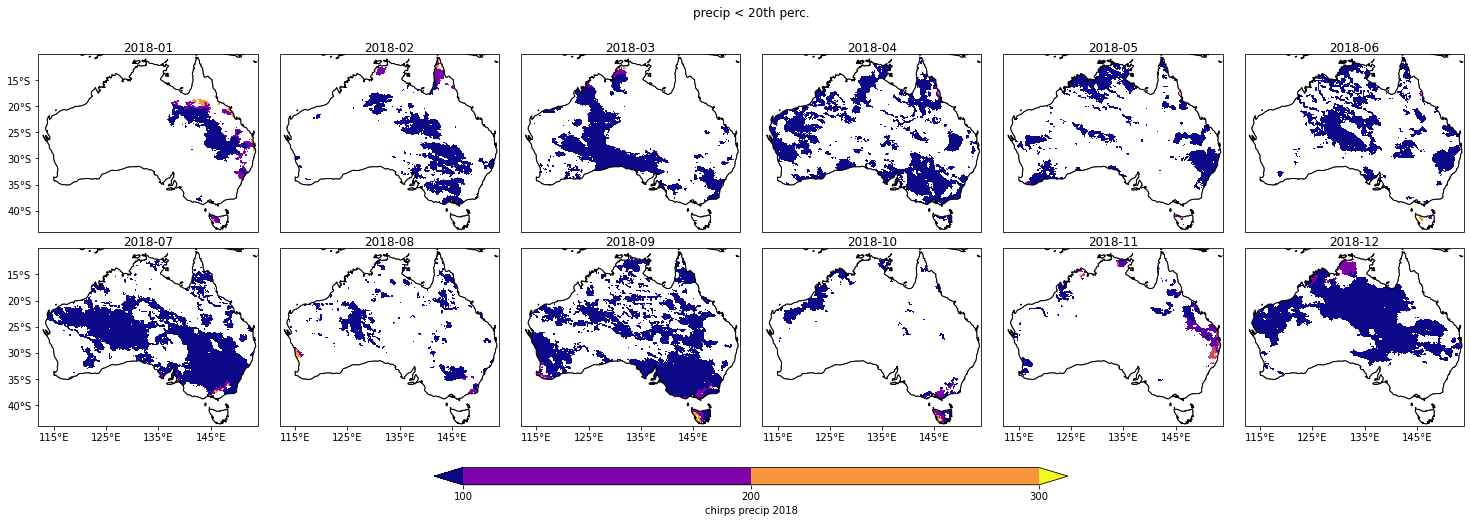

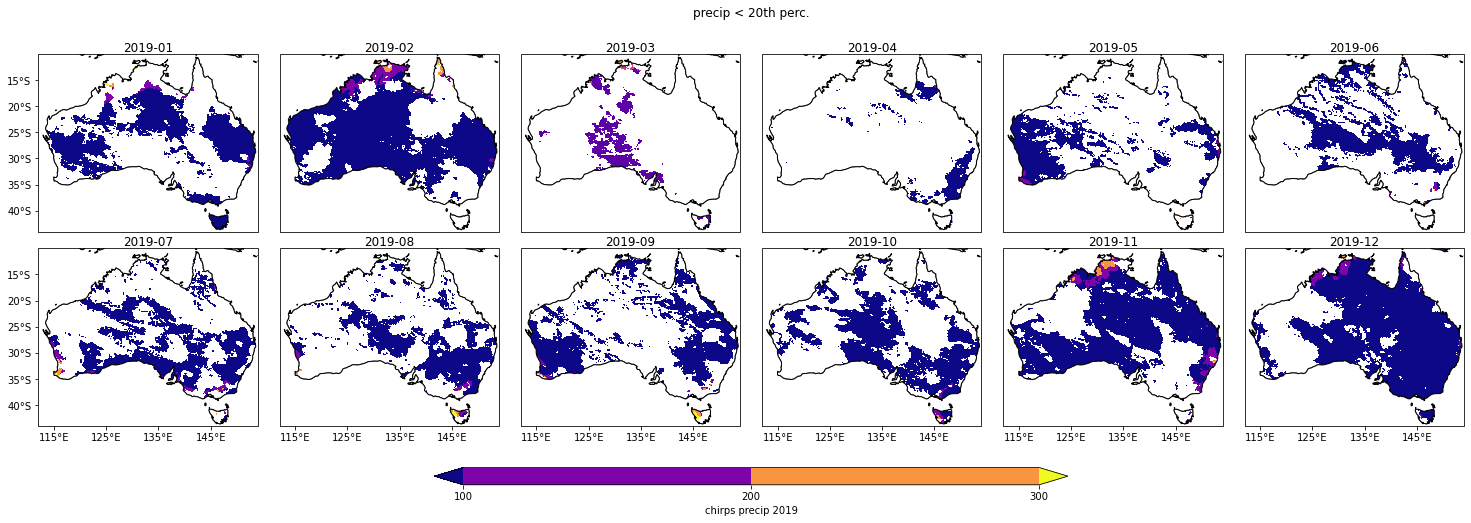

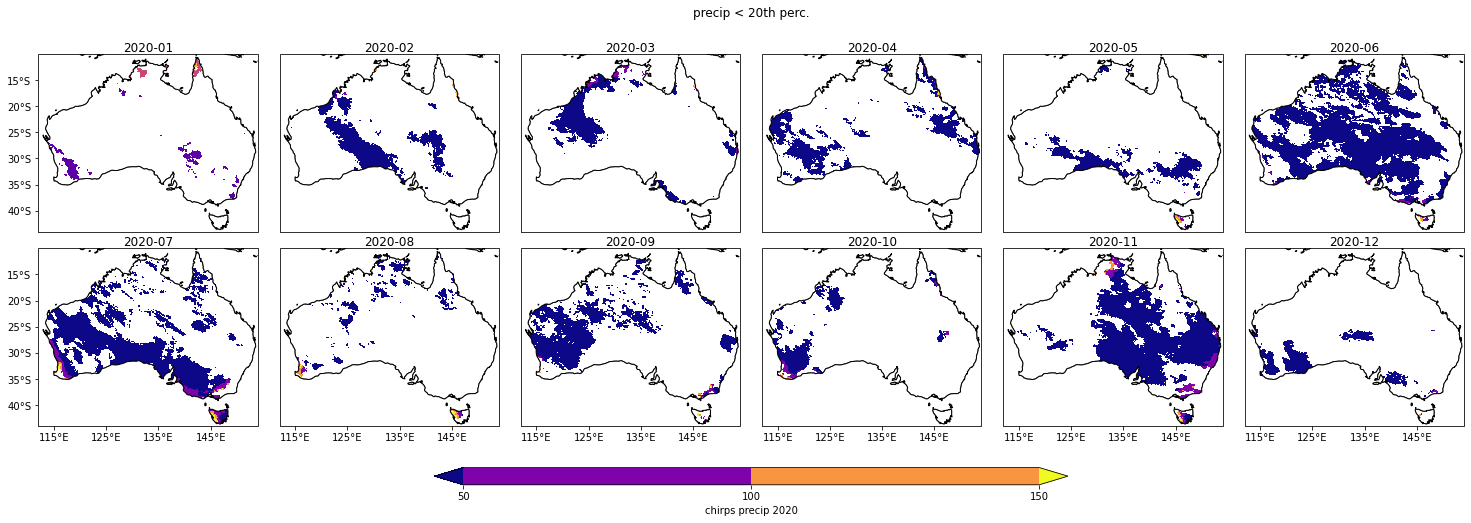

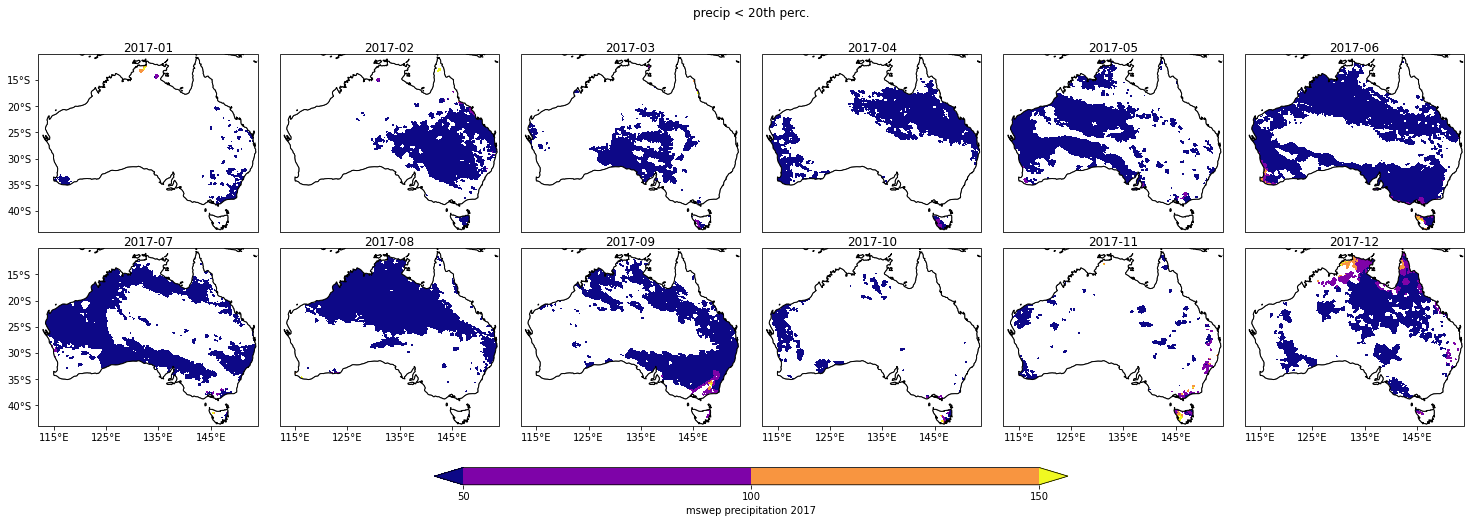

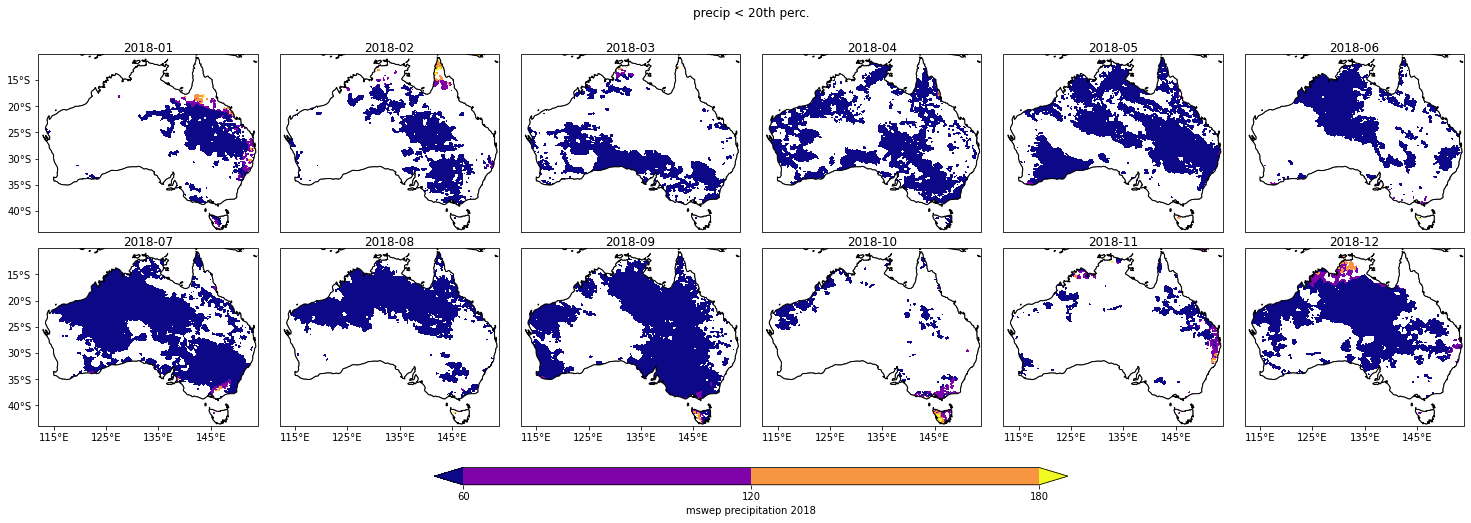

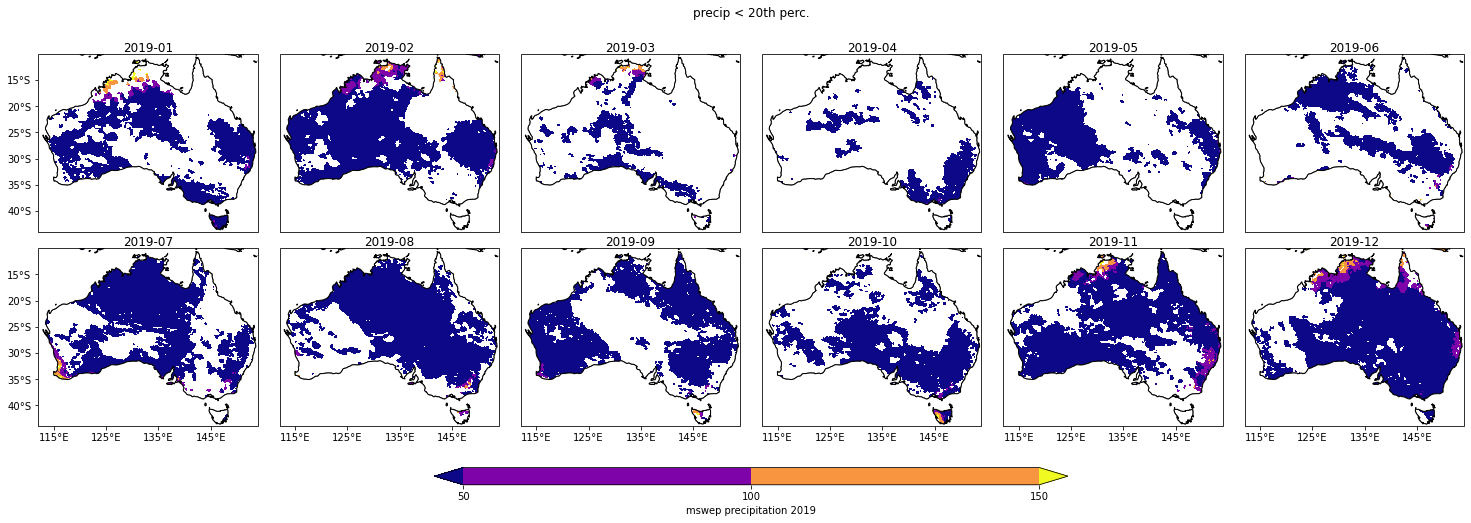

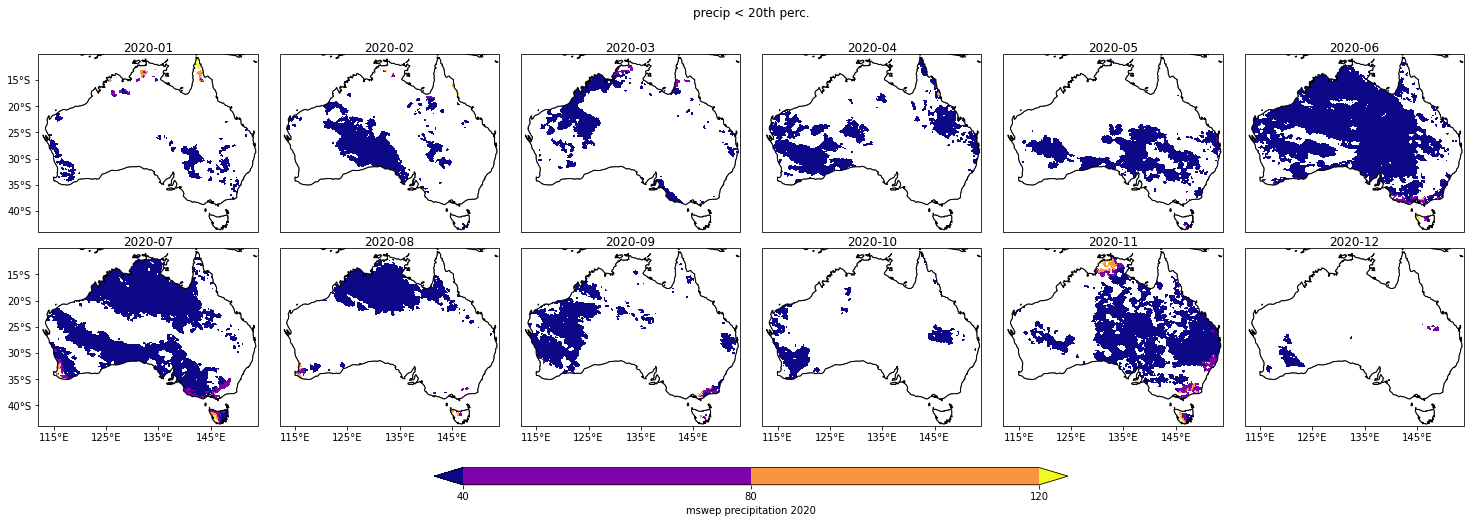

In [75]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = data_dir + 'drght_20th_perc_baseline_198101_202005/'
fig_dir = 'figures/drought_2017to2020/precip/below_20th_perc/'
figname_prefix = 'below20p'

thresh_dir = data_dir + '20th_percentile/'
out_dir = data_dir + 'drght_20th_perc_baseline_198101_202005/'

time_slice = slice('2017-01-01', '2020-12-31')

cmap = 'plasma' #"YlGnBu"

levels = 3 #[0, 10, 20, 30, 40, 50]

for d in ['agcd', 'chirps', 'mswep']: #'agcd'
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(time = time_slice)
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_20th_perc_threshold.nc')
    da_below_thresh = get_data_below_thresh_bymon(da, ds_thresh[vname])
    da_below_thresh.to_netcdf(out_dir + alldata_dict[d]['mon_file'].split('.')[0] + '_lt_20th_perc.nc')
    
    ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    da_mask = ds_mask['land_mask']
    
    for year in [2017, 2018, 2019, 2020]:
        da_yr = da_below_thresh.sel(time = slice(str(year), str(year))).load()
        da_yr = da_yr*da_mask

        lat_size = abs((da_yr.lat[0]-da_yr.lat[-1]).values)
        lon_size = abs((da_yr.lon[0]-da_yr.lon[-1]).values)
        aspect = lon_size/lat_size
        
        da_plot = da_yr.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year))
        plot_list = [da_plot.sel(month=i) for i in da_plot.month.values]
        
        subplot_title = np.datetime_as_string(da_yr.time.values, unit='M')
        cbar_label = d + ' ' + vname + ' ' + str(year)

        main_title = data_type + ' < 20th perc.'
        out_figname = figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png'
        draw_spatial_plot_12panels(ds_list = plot_list, cmap = cmap, levels = levels, 
                                   subplot_title = subplot_title, main_title = main_title, out_dir = fig_dir, out_figname = out_figname, add_cbar = True, cbar_label = cbar_label)
        
        # da_yr.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = cmap, levels = levels) #"RdBu_r") "YlGnBu"
        # plt.savefig(fig_dir + figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png')
        del da_yr

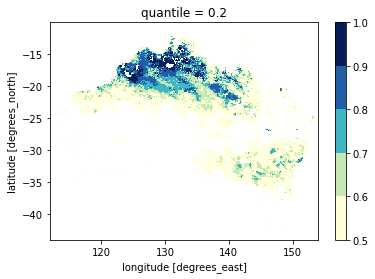

In [7]:
da_sel = da_below_thresh.sel(time = slice('2017-01-01', '2019-12-31'))
mon_sel = [6, 7, 8, 9]

da_sel = da_sel.sel(time = da_sel.time.dt.month.isin(mon_sel))
da_plot = da_sel.count('time')*da_mask/12
(da_plot.where(da_plot >= 0.5)).plot(levels = 6, cmap = 'YlGnBu')

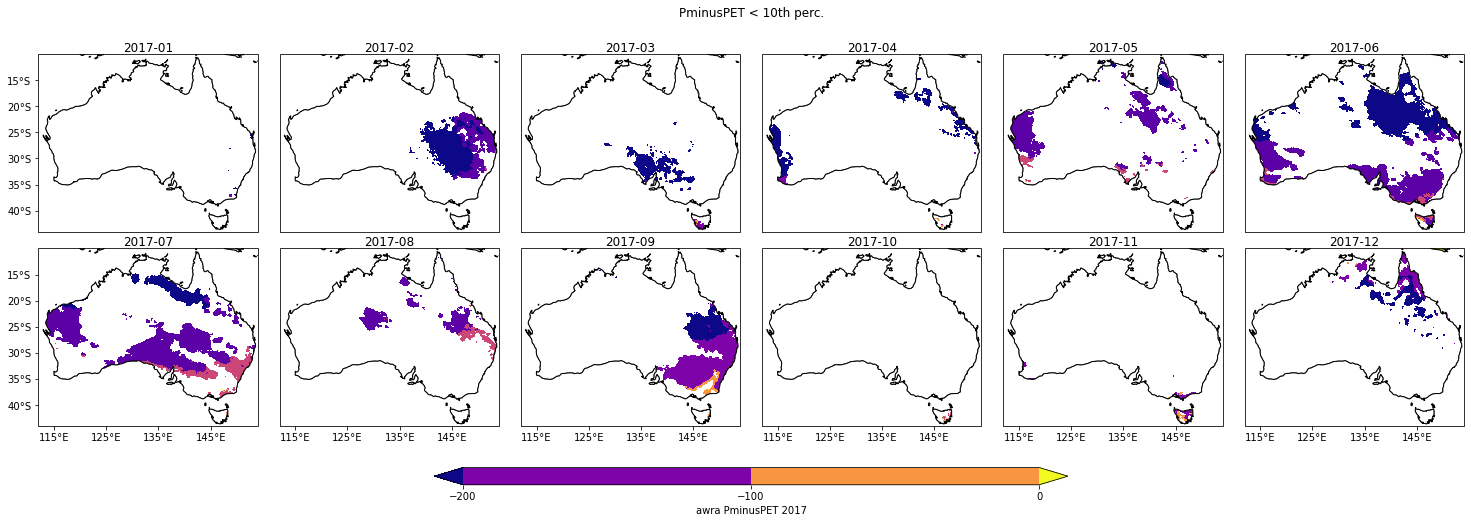

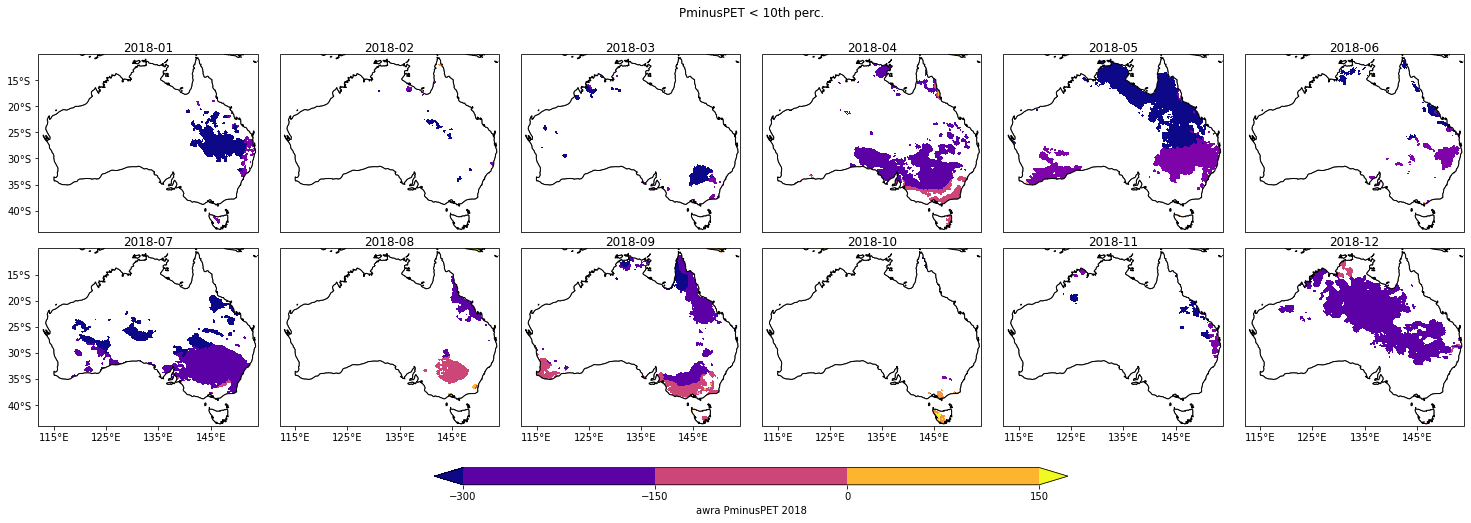

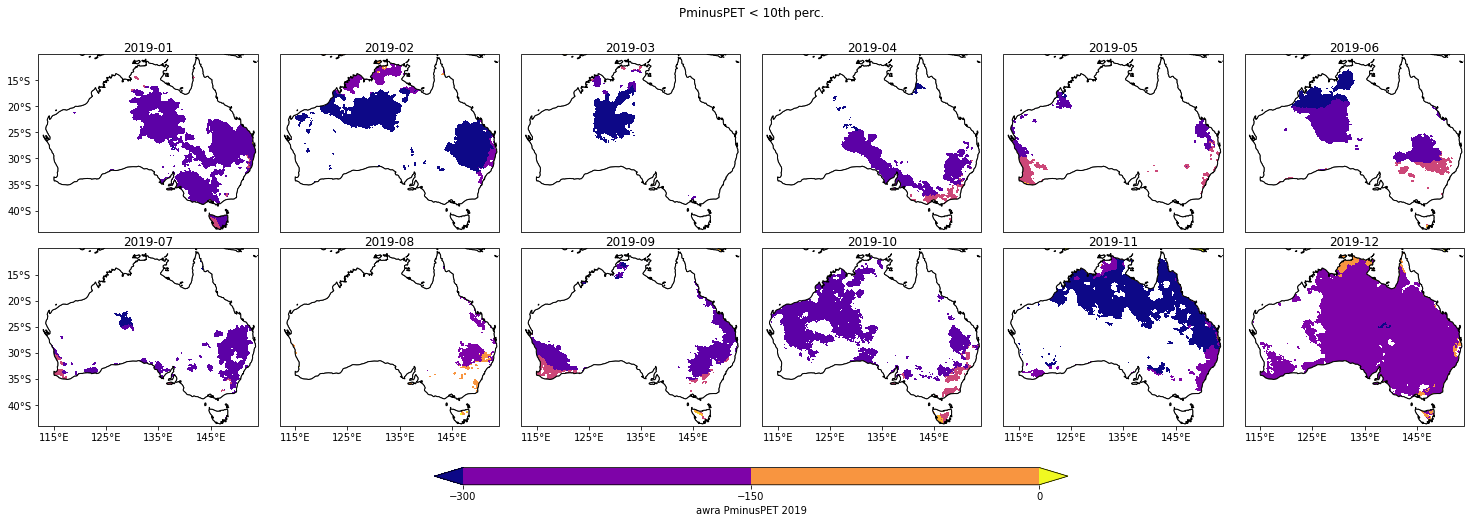

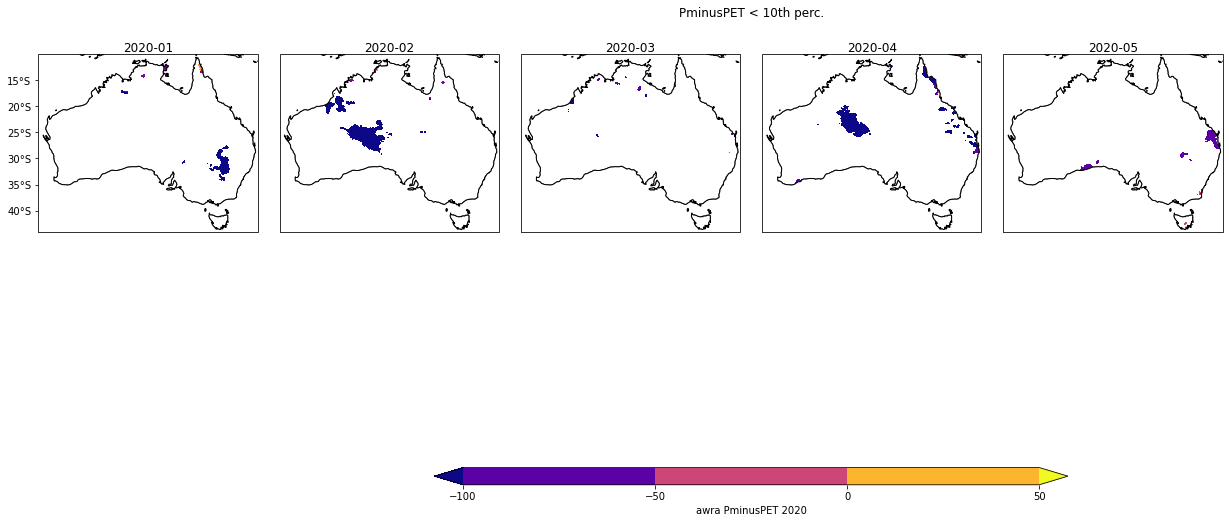

In [74]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusPET/'
out_dir = data_dir + 'drght_10th_perc_baseline_198101_202005/'
fig_dir = 'figures/drought_2017to2020/PminusPET/below_10th_perc/'
figname_prefix = 'below10p'

thresh_dir = data_dir + '10th_percentile/'
out_dir = data_dir + 'drght_10th_perc_baseline_198101_202005/'

time_slice = slice('2017-01-01', '2020-12-31')

levels = 3 #[0, 10, 20, 30, 40, 50]
cmap = 'plasma'

for d in ['awra']: #'chirps', 'agcd'
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(time = time_slice)
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_10th_perc_threshold.nc')
    da_below_thresh = get_data_below_thresh_bymon(da, ds_thresh[vname])
    #da_below_thresh.to_netcdf(out_dir + alldata_dict[d]['mon_file'].split('.')[0] + '_lt_10th_perc.nc')
    
    for year in [2017, 2018, 2019, 2020]:
        da_yr = da_below_thresh.sel(time = slice(str(year), str(year))).load()

        lat_size = abs((da_yr.lat[0]-da_yr.lat[-1]).values)
        lon_size = abs((da_yr.lon[0]-da_yr.lon[-1]).values)
        aspect = lon_size/lat_size
        
        da_plot = da_yr.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year))
        plot_list = [da_plot.sel(month=i) for i in da_plot.month.values]
        
        subplot_title = np.datetime_as_string(da_yr.time.values, unit='M')
        cbar_label = d + ' ' + vname + ' ' + str(year)

        main_title = data_type + ' < 10th perc.'
        out_figname = figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png'
        draw_spatial_plot_12panels(ds_list = plot_list, cmap = cmap, levels = levels, 
                                   subplot_title = subplot_title, main_title = main_title, out_dir = fig_dir, out_figname = out_figname, add_cbar = True, cbar_label = cbar_label)

        # ds_mask = xr.open_dataset('/g/data/w97/ad9701/drought_2017to2020/precip_data/agcd_land_mask.nc')
        # (da_yr*ds_mask['land_mask']).groupby('time.month').mean().rename(vname + ' ' + str(year)).plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = "YlGnBu", levels = levels) #"RdBu_r") "YlGnBu"
        # plt.savefig(fig_dir + figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png')
        del da_yr

### Is the monthly mean rainfall during 2017-19 below the corresponding 10th/15th percentiles?

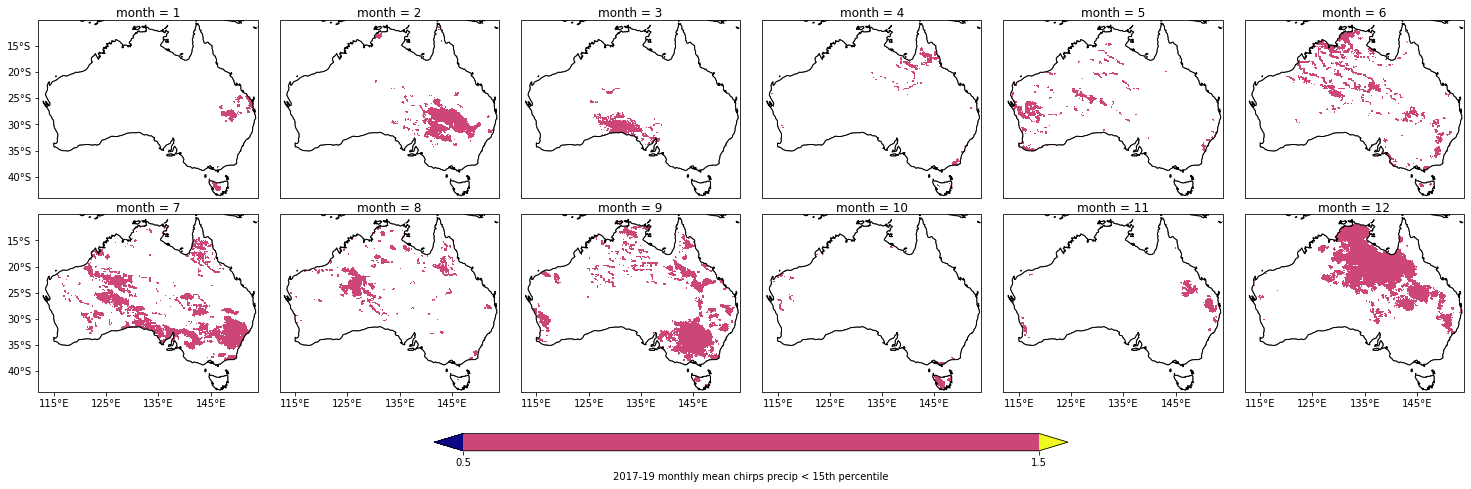

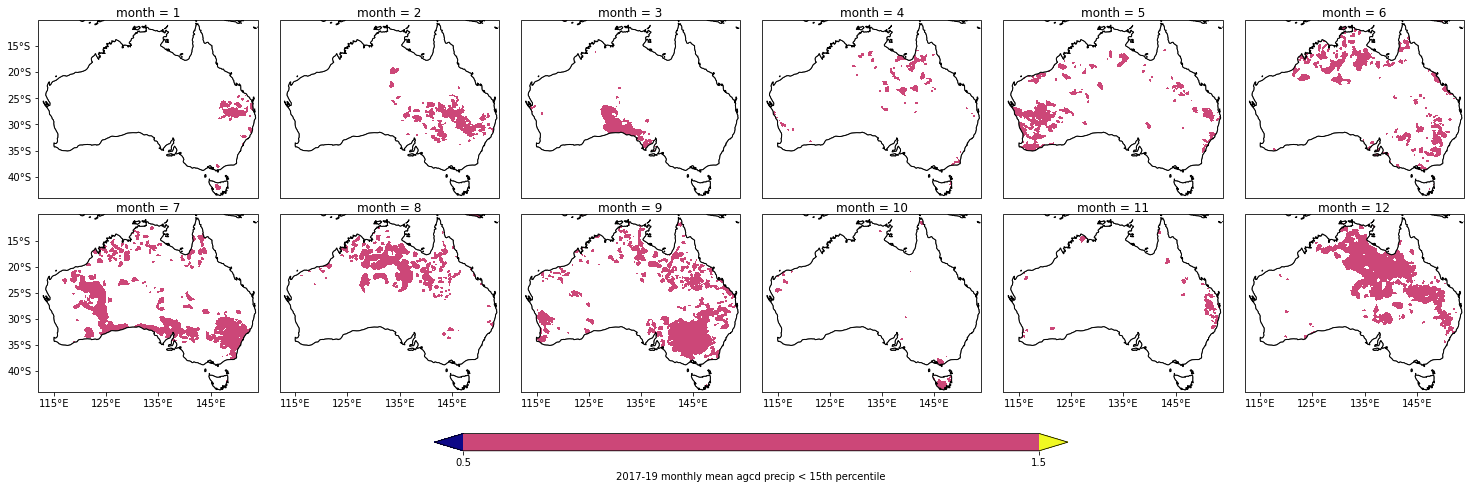

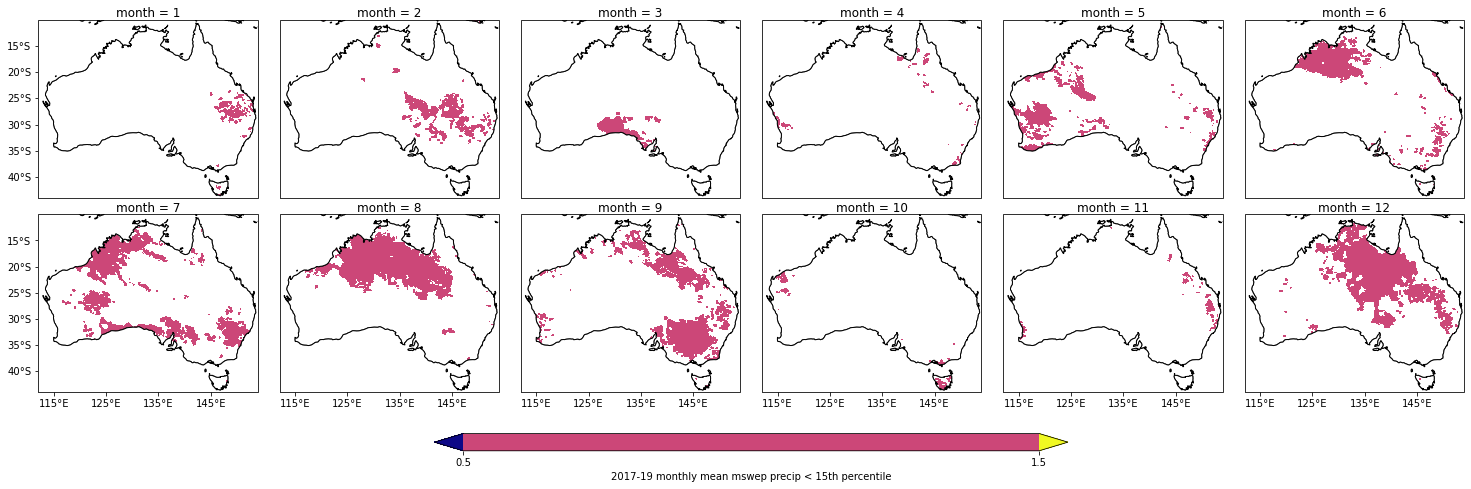

In [12]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'


perc = 15
fig_dir = 'figures/drought_2017to2020/precip/monMean_below_' + str(perc) + 'th_perc/'
figname_prefix = 'below' + str(perc) + 'p'

thresh_dir = data_dir + str(perc) + 'th_percentile/'
out_dir = data_dir + 'drght_' + str(perc) + 'th_perc_baseline_198101_202005_monMean/'
time_slice = slice('2017-01-01', '2019-12-31')

cmap = 'plasma' #"YlGnBu"
levels = [0.5, 1.5] #[0, 10, 20, 30, 40, 50]

for d in ['chirps', 'agcd', 'mswep']:
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(time = time_slice).groupby('time.month').mean('time')
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_' + str(perc) + 'th_perc_threshold.nc')
    da_thresh = ds_thresh[vname]
    da_below_thresh = da.where(da <= da_thresh)
    da_below_thresh.to_netcdf(out_dir + alldata_dict[d]['mon_file'].split('.')[0] + '_lt_' + str(perc) + 'th_perc.nc')
    
    ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    da_plot = xr.where(~np.isnan(da_below_thresh), 1, np.nan)*ds_mask['land_mask']
    plot_list = [da_plot.sel(month = i) for i in range(1, 13)]
    out_figname = figname_prefix + '_monMean_' + d + '.png'
    subplot_title = ['month = ' + str(i) for i in range(1, 13)]
    
    cbar_label = '2017-19 monthly mean ' + d + ' ' + data_type + ' < ' + str(perc) + 'th percentile'
    
    draw_spatial_plot_12panels(plot_list, levels = levels, cmap = cmap, subplot_title = subplot_title, cbar_label = cbar_label) #, out_dir = fig_dir, out_figname = out_figname)

### Is the monthly mean P-PET during 2017-19 below the corresponding 10th/15th percentiles?

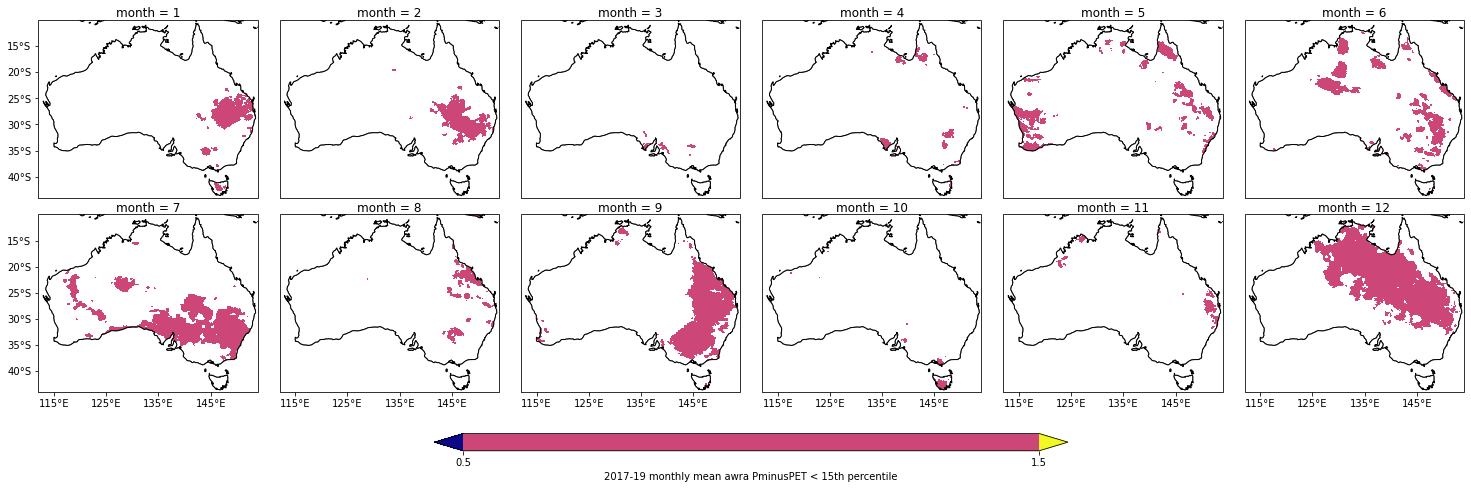

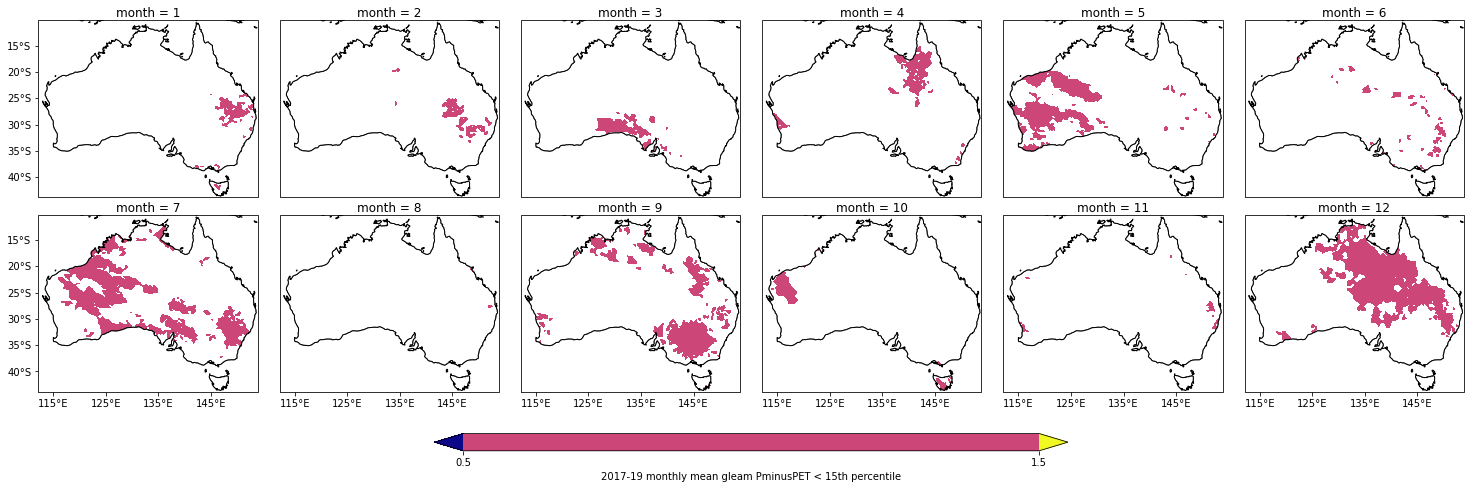

In [5]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusPET/'

perc = 15
fig_dir = 'figures/drought_2017to2020/PminusPET/monMean_below_' + str(perc) + 'th_perc/'
figname_prefix = 'below' + str(perc) + 'p'

thresh_dir = data_dir + str(perc) + 'th_percentile/'
out_dir = data_dir + 'drght_' + str(perc) + 'th_perc_baseline_198101_202005_monMean/'
time_slice = slice('2017-01-01', '2019-12-31')

cmap = 'plasma' #"YlGnBu"
levels = [0.5, 1.5] #[0, 10, 20, 30, 40, 50]

for d in ['awra', 'gleam']:
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(time = time_slice).groupby('time.month').mean('time')
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_' + str(perc) + 'th_perc_threshold.nc')
    da_thresh = ds_thresh[vname]
    da_below_thresh = da.where(da <= da_thresh)
    da_below_thresh.to_netcdf(out_dir + alldata_dict[d]['mon_file'].split('.')[0] + '_lt_' + str(perc) + 'th_perc.nc')
    
    #ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    da_plot = xr.where(~np.isnan(da_below_thresh), 1, np.nan)#*ds_mask['land_mask']
    plot_list = [da_plot.sel(month = i) for i in range(1, 13)]
    out_figname = figname_prefix + '_monMean_' + d + '.png'
    subplot_title = ['month = ' + str(i) for i in range(1, 13)]
    
    cbar_label = '2017-19 monthly mean ' + d + ' ' + data_type + ' < ' + str(perc) + 'th percentile'
    
    draw_spatial_plot_12panels(plot_list, levels = levels, cmap = cmap, subplot_title = subplot_title, out_dir = fig_dir, out_figname = out_figname, cbar_label = cbar_label)

### Combining information based on percentile thresholds of P & P-E

In [13]:
# loading data from the saved netcdf files

perc = 15
data_dir_P = '/g/data/w97/ad9701/drought_2017to2020/precip_data/drght_' + str(perc) + 'th_perc_baseline_198101_202005_monMean/'
data_dir_PminusPET = '/g/data/w97/ad9701/drought_2017to2020/PminusPET/drght_' + str(perc) + 'th_perc_baseline_198101_202005_monMean/'
    
data_names = ['AGCD', 'MSWEP', 'CHIRPS', 'AWRA', 'GLEAM']
data_dir_list = [data_dir_P, data_dir_P, data_dir_P, data_dir_PminusPET, data_dir_PminusPET]

below_xp_list = []
for i in range(len(data_names)):
    d = data_names[i].lower()
    fname = glob.glob(data_dir_list[i] + '*' + d + '*.nc')[0]
    
    data_type = (data_dir_list[i].split('/')[-3]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    ds = xr.open_dataset(fname)
    
    # a flag array: setting the drought grids (below 10th percentile) to 1
    da_flag = xr.where(~np.isnan(ds[vname]), 1, np.nan)
    below_xp_list.append(da_flag)

In [14]:
below_xp_list_regrid = regrid_all_from_list(below_xp_list)

da_below_xo = xr.concat(below_xp_list_regrid, dim = "data").assign_coords({'data': data_names})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/core.py:456: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/core.py:456: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


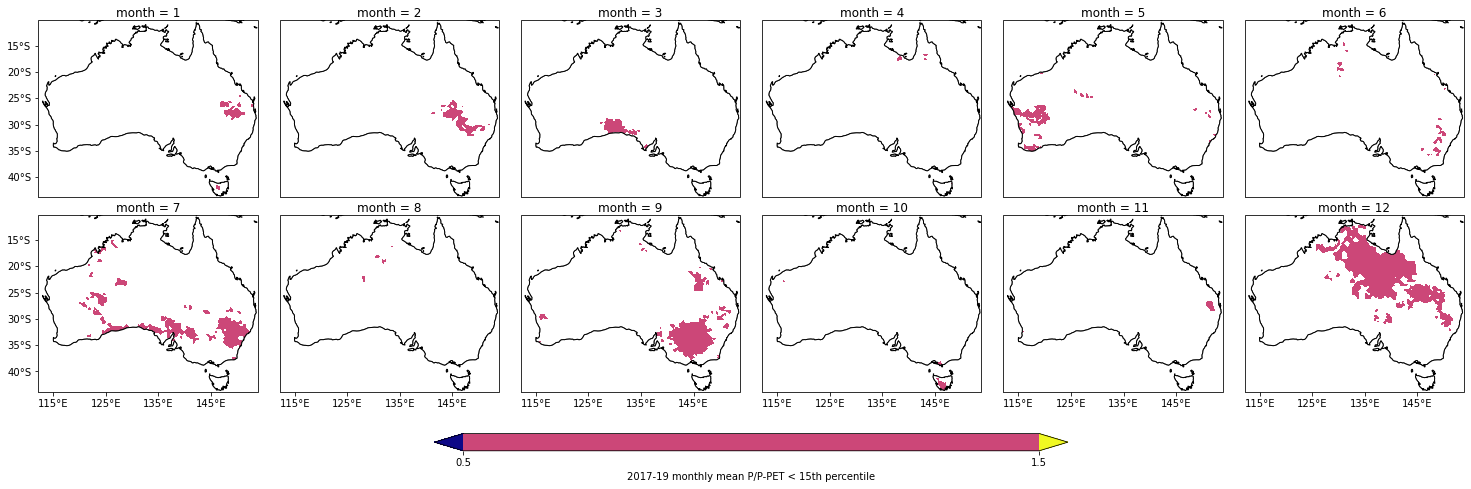

In [15]:
ds_mask = xr.open_dataset('/g/data/w97/ad9701/drought_2017to2020/PminusPET/gleam_land_mask.nc')
da_mask = ds_mask['land_mask']

da_plot = (da_below_xo*da_mask).sum('data')/5
da_plot = da_plot.where(da_plot > 0.5)
da_flag = xr.where(~np.isnan(da_plot), 1, np.nan)

plot_list = [da_flag.sel(month = i) for i in range(1, 13)]

cmap = 'plasma' #"YlGnBu"
levels = [0.5, 1.5] #[0, 10, 20, 30, 40, 50]

fig_dir = 'figures/drought_2017to2020/drought_focusReg/'
out_figname = 'Atleast_3outof5_monMean_below_' + str(perc) + 'p.png'
subplot_title = ['month = ' + str(i) for i in range(1, 13)]

cbar_label = '2017-19 monthly mean P/P-PET < ' + str(perc) + 'th percentile'

draw_spatial_plot_12panels(plot_list, levels = levels, cmap = cmap, subplot_title = subplot_title, out_dir = fig_dir, out_figname = out_figname, cbar_label = cbar_label)

### Soil moisture

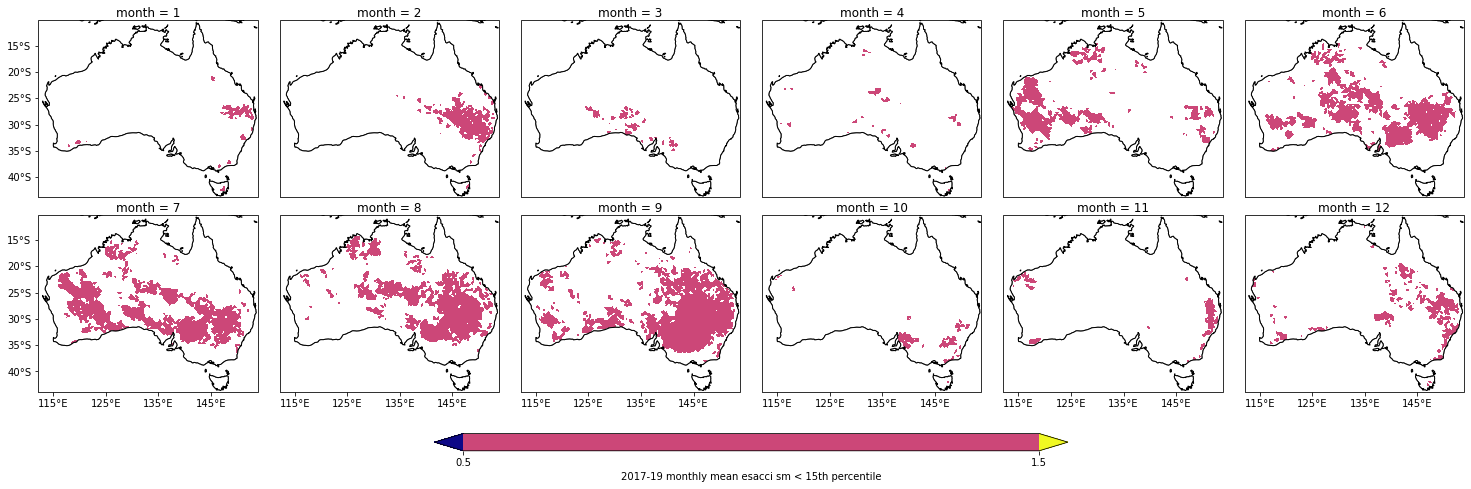

In [11]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/sm_data/'

perc = 15
fig_dir = 'figures/drought_2017to2020/sm/monMean_below_' + str(perc) + 'th_perc/'
figname_prefix = 'below' + str(perc) + 'p'

thresh_dir = data_dir + str(perc) + 'th_percentile/'
out_dir = data_dir + 'drght_' + str(perc) + 'th_perc_baseline_198101_202005_monMean/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir) 
    
time_slice = slice('2017-01-01', '2019-12-31')

cmap = 'plasma' #"YlGnBu"
levels = [0.5, 1.5] #[0, 10, 20, 30, 40, 50]

for d in ['esacci']:
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if (data_type == 'precip') | (data_type == 'sm'):
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(time = time_slice).groupby('time.month').mean('time')
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_' + str(perc) + 'th_perc_threshold.nc')
    da_thresh = ds_thresh[vname]
    da_below_thresh = da.where(da <= da_thresh)
    da_below_thresh.to_netcdf(out_dir + alldata_dict[d]['mon_file'].split('.')[0] + '_lt_' + str(perc) + 'th_perc.nc')
    
    da_plot = xr.where(~np.isnan(da_below_thresh), 1, np.nan)
    plot_list = [da_plot.sel(month = i) for i in range(1, 13)]
    out_figname = figname_prefix + '_monMean_' + d + '.png'
    subplot_title = ['month = ' + str(i) for i in range(1, 13)]
    
    cbar_label = '2017-19 monthly mean ' + d + ' ' + data_type + ' < ' + str(perc) + 'th percentile'
    
    draw_spatial_plot_12panels(plot_list, levels = levels, cmap = cmap, subplot_title = subplot_title, cbar_label = cbar_label) #, out_dir = fig_dir, out_figname = out_figname)